In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)


In [2]:
from google.colab import files

uploaded = files.upload()


Saving listings.csv to listings.csv


In [4]:
df = pd.read_csv('listings.csv')
print("Dimensão do dataset:", df.shape)
df.head()


Dimensão do dataset: (3818, 92)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

,0
id,0
listing_url,0
scrape_id,0
last_scraped,0
name,0
...,...
cancellation_policy,0
require_guest_profile_picture,0
require_guest_phone_verification,0
calculated_host_listings_count,0


In [7]:
df['price'] = df['price'].replace({'\$':'', ',':''}, regex=True).astype(float)


In [9]:
df = df[df['price'] > 0]

df.drop_duplicates(inplace=True)

print("Dimensão após limpeza:", df.shape)


Dimensão após limpeza: (3818, 92)


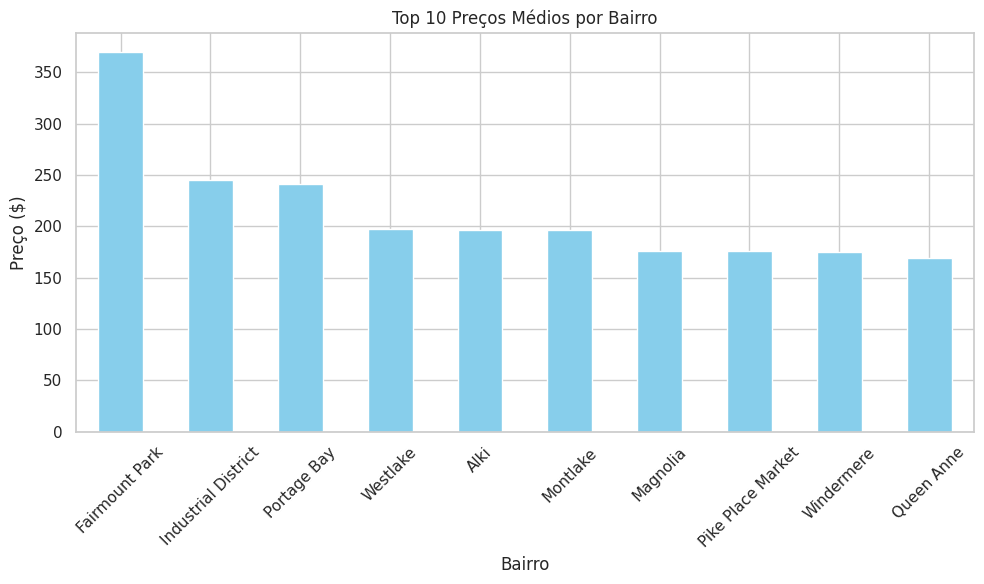

In [14]:
top10_price = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)
top10_price.plot(kind='bar', color='skyblue')
plt.title('Top 10 Preços Médios por Bairro')
plt.ylabel('Preço ($)')
plt.xlabel('Bairro')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


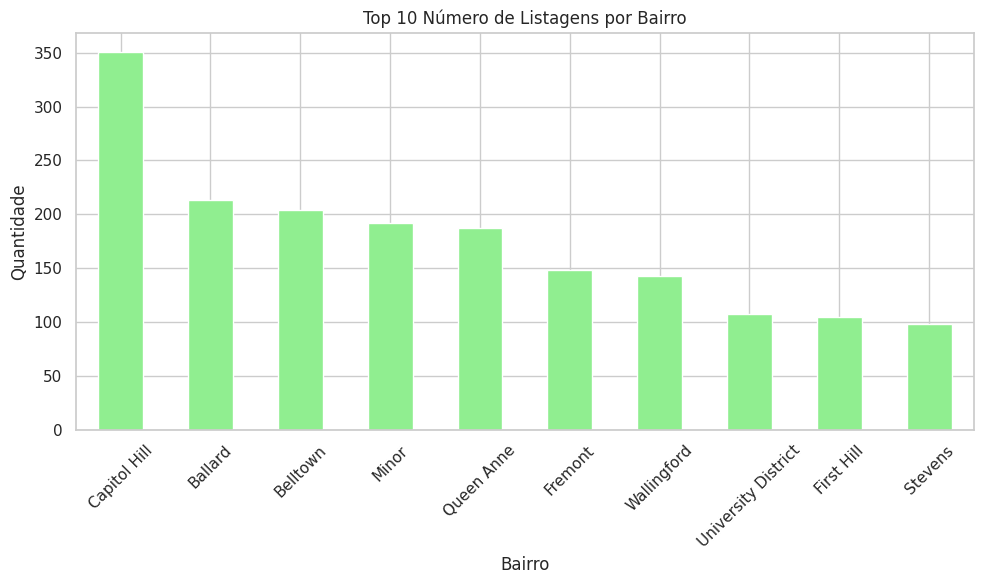

In [15]:
top10_listings = df['neighbourhood'].value_counts().head(10)
top10_listings.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Número de Listagens por Bairro')
plt.ylabel('Quantidade')
plt.xlabel('Bairro')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


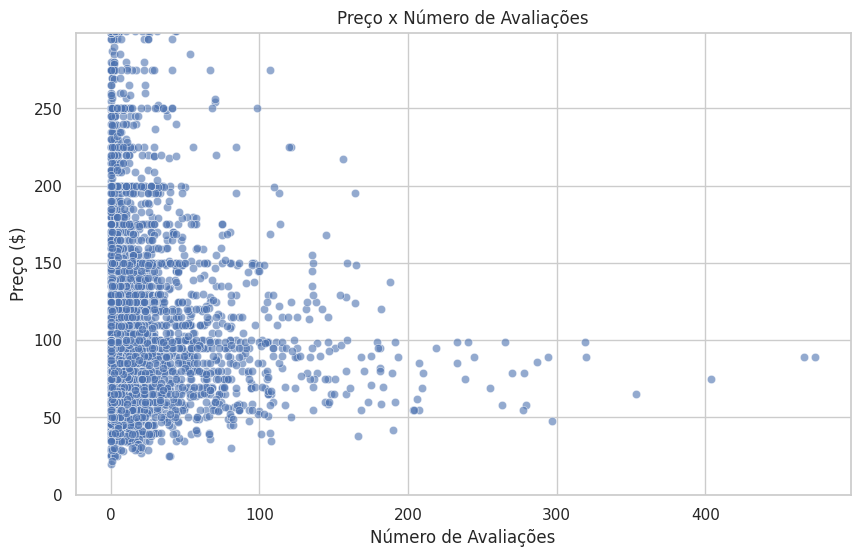

In [17]:
sns.scatterplot(x='number_of_reviews', y='price', data=df, alpha=0.6)
plt.title('Preço x Número de Avaliações')
plt.xlabel('Número de Avaliações')
plt.ylabel('Preço ($)')
plt.ylim(0, df['price'].quantile(0.95))
plt.show()


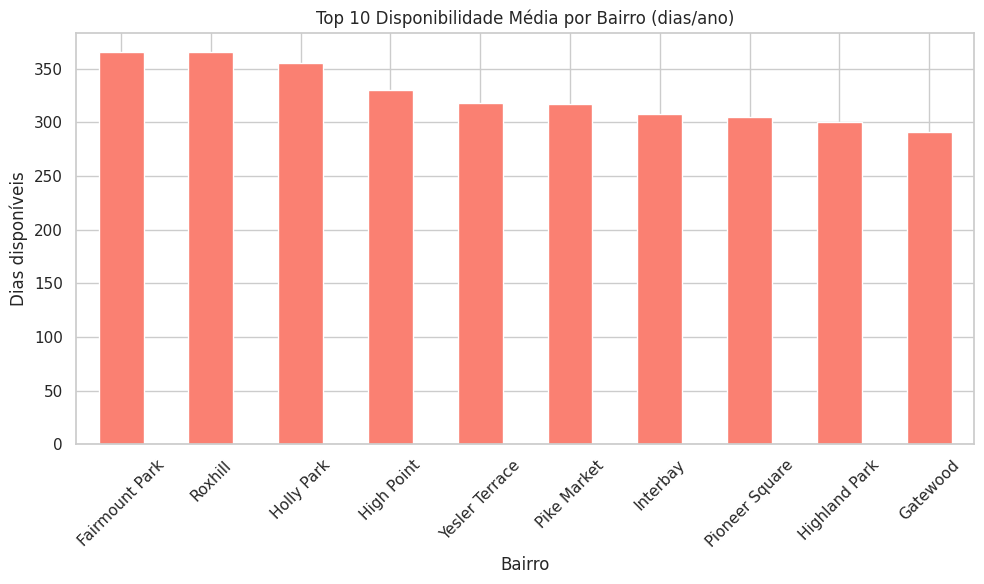

In [18]:
top10_availability = df.groupby('neighbourhood')['availability_365'].mean().sort_values(ascending=False).head(10)
top10_availability.plot(kind='bar', color='salmon')
plt.title('Top 10 Disponibilidade Média por Bairro (dias/ano)')
plt.ylabel('Dias disponíveis')
plt.xlabel('Bairro')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [19]:
print("""
Insights:
1. Alguns bairros possuem preços médios significativamente mais altos.
2. Existem bairros com grande concentração de listagens, enquanto outros têm poucas.
3. A correlação entre preço e número de avaliações é baixa, indicando que avaliações não dependem do preço.
4. Alguns bairros possuem imóveis disponíveis durante quase todo o ano.
""")



Insights:
1. Alguns bairros possuem preços médios significativamente mais altos.
2. Existem bairros com grande concentração de listagens, enquanto outros têm poucas.
3. A correlação entre preço e número de avaliações é baixa, indicando que avaliações não dependem do preço.
4. Alguns bairros possuem imóveis disponíveis durante quase todo o ano.

